# EDA(Exploratory Data Analysis)_시각화 작업(2)

### 학습 목표
- EDA(탐색적 데이터 분석)의 개념을 이해한다.
- Pandas와 Matplotlib에서는 제공하지 않는, Seaborn만이 제공하는 흥미로운 그래프들을 실습을 통해 익힌다.

## 그래프 시각화 작업
1. Pandas의 내장 함수 사용하기 --> plot()
2. Matplotlib, Seaborn과 같은 시각화 작업 전용 라이브러리 사용하기

### - Seaborn 라이브러리 활용하기

In [1]:
# 라이브러리 셋팅
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/titanic.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Fare'>

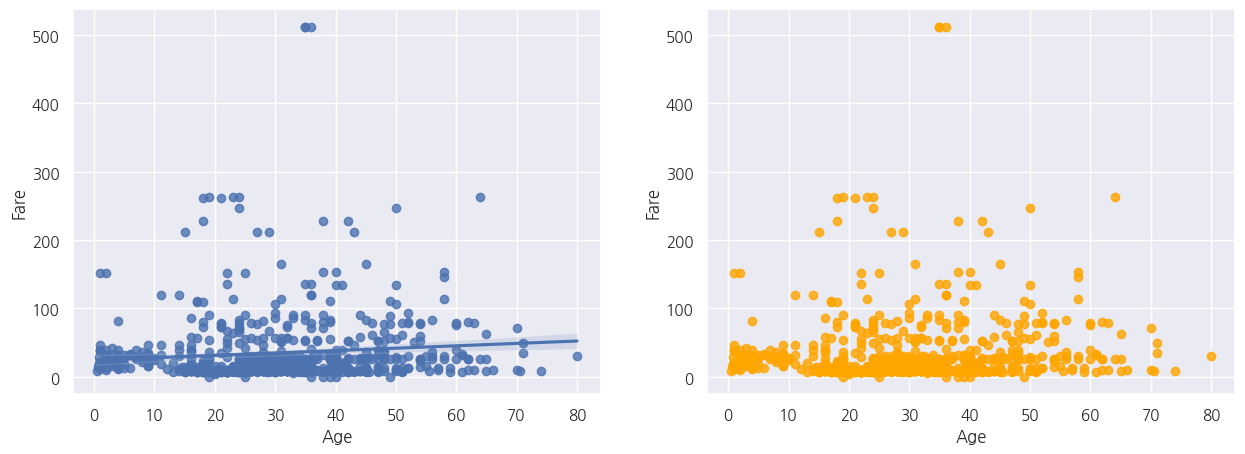

In [3]:
# 회귀선이 있는 산점도(scatterplot)
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='Age', y='Fare', data=df, ax=ax1)
sns.regplot(x='Age', y='Fare', data=df, ax=ax2, color='orange', fit_reg=False)



In [4]:
# pivot_table 작성 --> 성별, 좌석등급

data = df.pivot_table(index='Sex', columns='Pclass', aggfunc='size') # size는 각 경우의 해단건수를 더해라
data


Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<Axes: xlabel='Pclass', ylabel='Sex'>

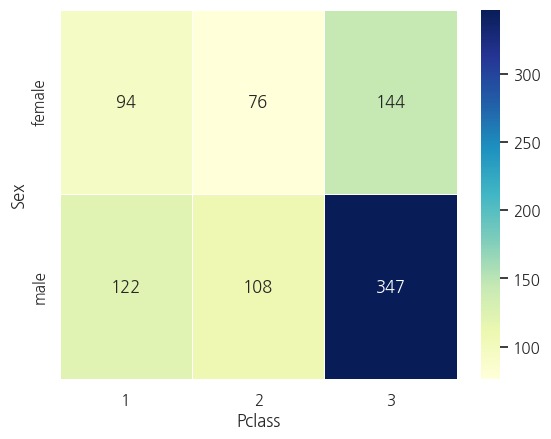

In [14]:
# heatmap --> x, y 양축을 두고 일종의 pivot table의 값을 색상의 진하기 정도로 value 값을 표현하는 그래프
sns.heatmap(data, annot=True, fmt='d', linewidths=0.5, cbar=True, cmap='YlGnBu')
# 숫자표시, 숫자형식(decimal), 선으ㅟ 굵기, 색상 bar

<Axes: xlabel='Sex', ylabel='Survived'>

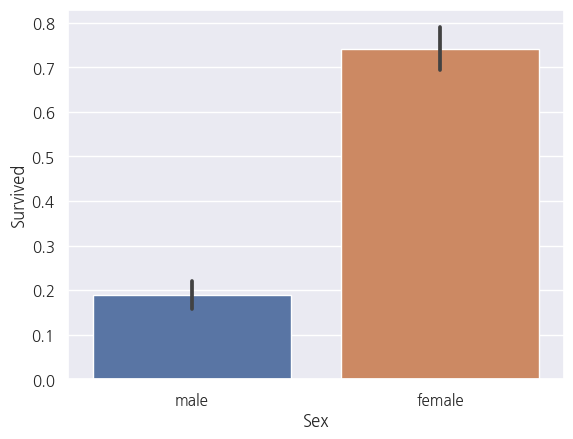

In [15]:
# 막대 그래표 - 성별 생존자 수 --> barplot()

# sns.set(rc = {'figure.figsize':(15,8)})
# sns.set(font_scale=1.5)
sns.barplot(data=df, x = 'Sex', y = 'Survived')


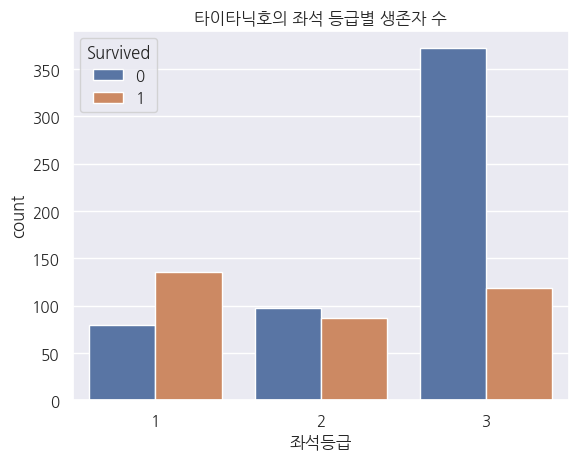

In [18]:
# 빈도 그래프 - 각 범주별 데이터의 개수에 대한 막대 그래표 --> countplot()
# 좌석 등급에 따른 생존자/사망자 수 비교

sns.countplot(x="Pclass", data=df, hue='Survived') 
# hue --> color, 구분해라, 그룹핑변수(집단변수)
plt.title("타이타닉호의 좌석 등급별 생존자 수")
# x 축 레이블 변경
plt.xlabel('좌석등급')
plt.show()


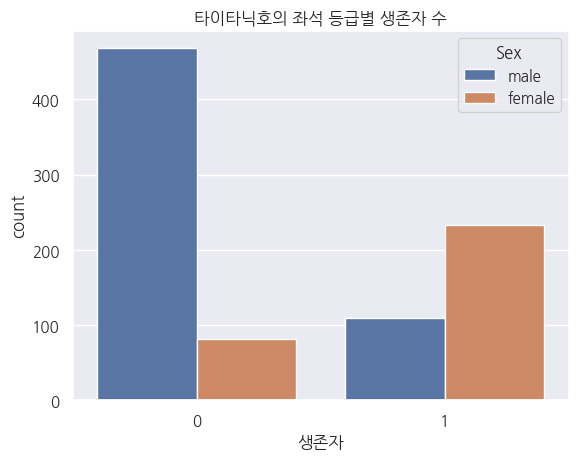

In [19]:
sns.countplot(x="Survived", data=df, hue='Sex') 
# hue --> color, 구분해라, 그룹핑변수(집단변수)
plt.title("타이타닉호의 좌석 등급별 생존자 수")
# x 축 레이블 변경
plt.xlabel('생존자')
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

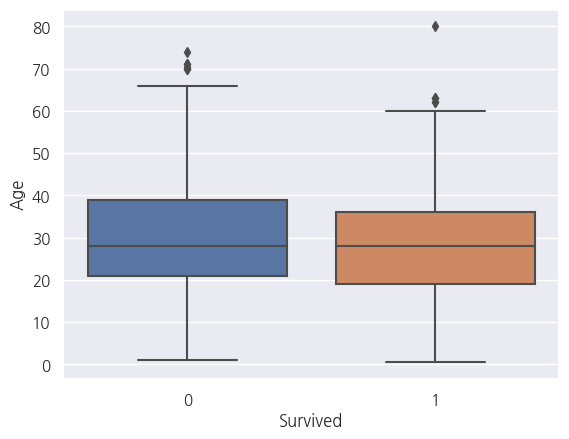

In [20]:
# Box plot
# 사망자와 생존자의 연령비교

sns.boxplot(data=df, x='Survived',y='Age')
# Q1 - 1.5(Q3-Q1, |QR), Q1, Q2, Q3, Q4, 

<Axes: xlabel='Survived', ylabel='Age'>

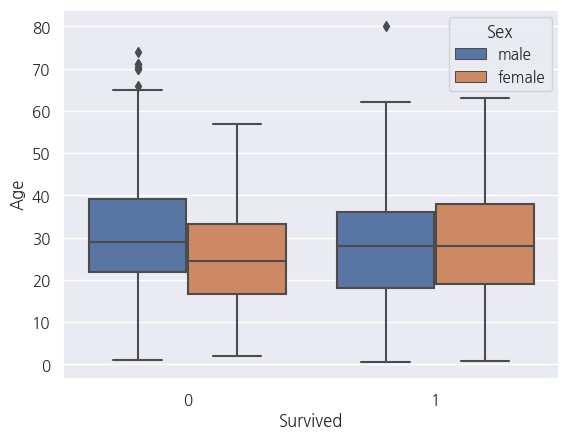

In [21]:
sns.boxplot(data=df, x='Survived',y='Age', hue="Sex")

<Axes: xlabel='Survived', ylabel='Age'>

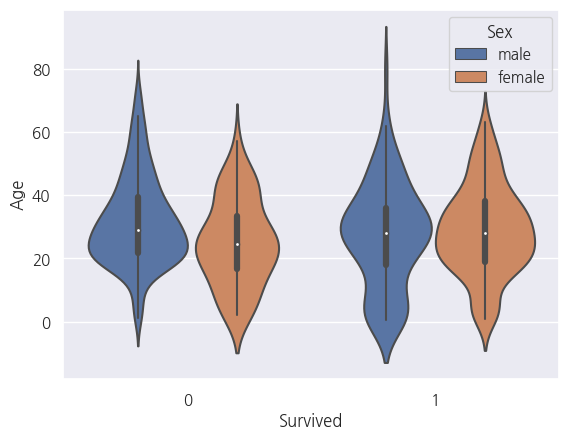

In [22]:
# violin graph --> 분포를 함께 파악

sns.violinplot(data=df, x='Survived',y='Age', hue="Sex")

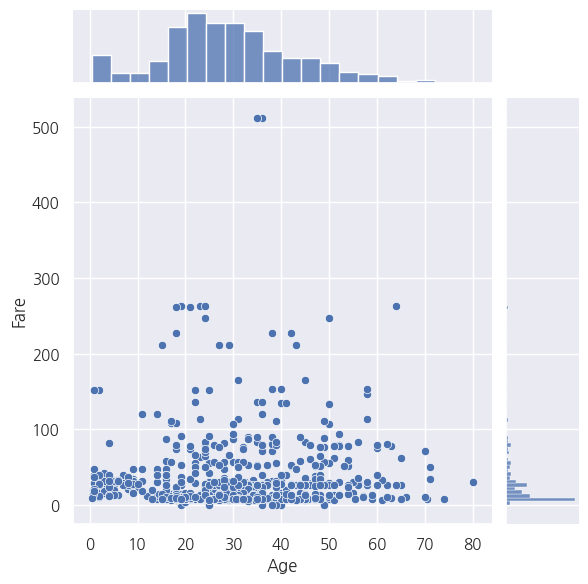

In [23]:
# join graph --> 산점도(scatter plot)를 기본으로 각 변수에 대한 히스토그램을 동시에 보여 줌
# jointplot()
sns.jointplot(data=df, x='Age', y='Fare')
# 나이와 요금간의 산포도, 나이 및 요금의 분포

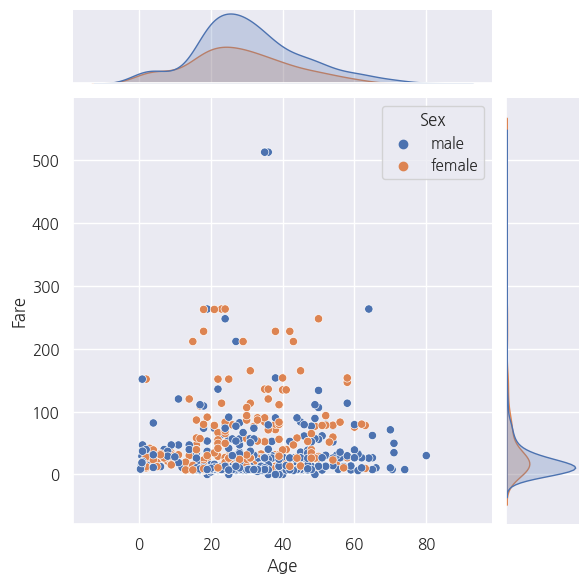

In [25]:
sns.jointplot(data=df, x='Age', y='Fare', hue='Sex')

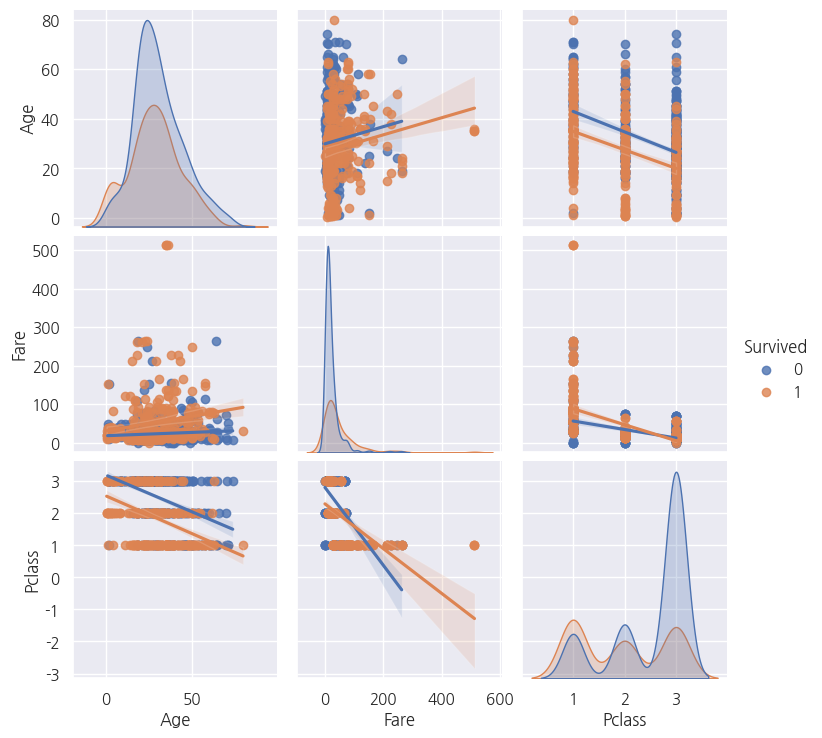

In [28]:
# pairplot --> 여러 변수들 간의 상관관계를 한꺼번에 보여주는 그래프

sns.pairplot(data=df, vars=['Age', 'Fare', 'Pclass'], kind='reg', hue='Survived')

EDA 마친후

> - 원인(독립) 변수와 결과(종속) 변수가 결정
> - 원인변수가 종속변수에 미치는 영향의 정도는 이후 Modeling과정에서 분석